## Reconocimiento de Patrones en Imágenes - Tarea 1  
Profesor: Miguel Carrasco  
Alumno: Cristopher Lincoleo  
07-08-2023

#### 1. Carga de librerias necesarias

In [18]:
#Carga de libreriías

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

#### 2. Carga de imagen

In [19]:
#Cargar la imagen
img = cv2.imread('sopa_letras.png', cv2.IMREAD_GRAYSCALE) #IMREAD_GRAYSCALE: para leer la imagen en 1 banda y escala de grises

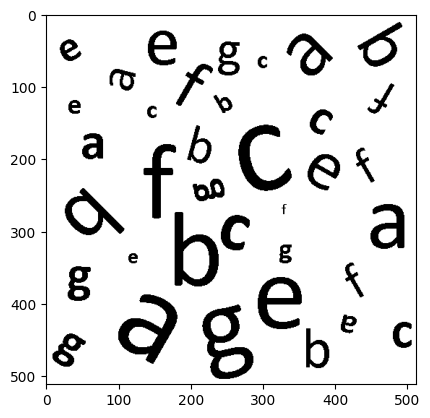

In [20]:
#Visualización de la imagen de entrada
plt.imshow(img, cmap='gray')
plt.show()

#### 3. Transformaciones necesarias

In [21]:
#Vemos que el arreglo tiene valores 0 y 255

np.unique(img, return_counts=True)

(array([  0, 255], dtype=uint8), array([ 34480, 227664], dtype=int64))

In [22]:
#Binarizamos la imagen, posteriormente encontramos los contornos
_, imagen_binaria = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(imagen_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [23]:
# El algoritmo detectó 36 contornos (letras)
print("Número de contornos detectados:", len(contours))

Número de contornos detectados: 36


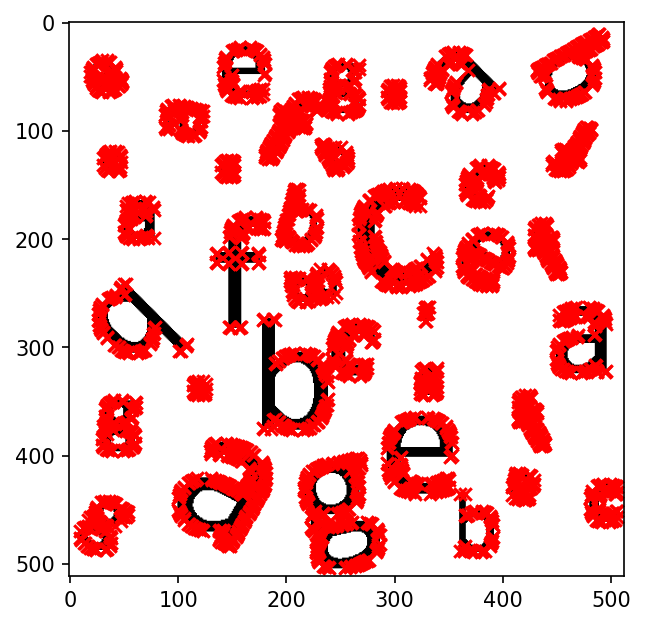

In [24]:
# Solo para visualizar, generamos una lista de los puntos de contornos (coordenadas). Se observa que los contornos fueron creados con el mínimo de puntos
coordenadas_contornos = []
for contour in contours:
    coordenadas_contornos.extend(contour[:, 0, :])

# Convierte la lista en un array NumPy
coordenadas_contornos = np.array(coordenadas_contornos)

# Grafica la imagen y las coordenadas de los contornos
plt.figure(dpi=150)
plt.imshow(img, cmap='gray')
plt.scatter(coordenadas_contornos[:, 0], coordenadas_contornos[:, 1], color='red', marker='x')
plt.show()

#### 4. Calculo de los descriptores

A continuación, se crea una lista donde se almacenarán los descriptores, los cuales se irán añadiendo a través de un ciclo for que recorre cada uno de los contornos

In [25]:
# Como sabemos que hay 36 contornos, ajustamos la reportbilidad a 36 filas con 4 decimales
pd.options.display.max_rows = 36
pd.options.display.float_format = "{:.4f}".format

In [26]:
# Función para calcular las métricas de un contorno
def calcular_metricas(contour):
    momentos_hu = cv2.HuMoments(cv2.moments(contour)).flatten()[:4].round(4)
    perimetro = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    redondez = (4 * np.pi * area) / (perimetro **2)
    elipse = cv2.fitEllipse(contour)
    angulo_orientacion = elipse[2]
    return momentos_hu, perimetro, area, redondez, angulo_orientacion

# Calcular las métricas utilizando ThreadPoolExecutor para paralelización
with ThreadPoolExecutor() as executor:
    resultados = list(executor.map(calcular_metricas, contours))

In [27]:
# Dataframe con los resultados
columnas = ['Momentos_Hu', 'Perímetro', 'Área', 'Redondez', 'Orientación_Elipse']
df_resultados = pd.DataFrame(resultados, columns=columnas)

df_resultados

,Momentos_Hu,Perímetro,Área,Redondez,Orientación_Elipse
0,"[0.2386, 0.0167, 0.0002, 0.0001]",183.5807,1020.5000,0.3805,35.8815
1,"[0.1977, 0.0051, 0.0018, 0.0006]",172.4264,1110.0000,0.4692,164.0373
2,"[0.4018, 0.0311, 0.0104, 0.0033]",143.3970,429.0000,0.2622,10.4896
3,"[0.2238, 0.0033, 0.0009, 0.0004]",105.0122,308.5000,0.3515,6.9285
4,"[0.2521, 0.021, 0.0003, 0.0001]",391.3625,4214.0000,0.3457,169.3295
5,"[0.2379, 0.0052, 0.0013, 0.001]",385.7473,3686.5000,0.3113,23.7003
6,"[0.2478, 0.0026, 0.0005, 0.0013]",316.8944,2572.5000,0.3219,170.5030
7,"[0.2401, 0.0171, 0.0002, 0.0001]",184.7107,1053.0000,0.3878,3.9618
8,"[0.6132, 0.2912, 0.0367, 0.0123]",153.0955,317.5000,0.1702,158.3171
9,"[0.2235, 0.001, 0.0003, 0.0005]",59.7990,103.0000,0.3620,0.7018


#### 5. Visualización de los centros de masa de cada letra (contorno detectado)

In [28]:
# Calcular centros de masa para todos los contornos
centros_de_masa = [(int(cv2.moments(contour)['m10'] / cv2.moments(contour)['m00']), int(cv2.moments(contour)['m01'] / cv2.moments(contour)['m00'])) for contour in contours]

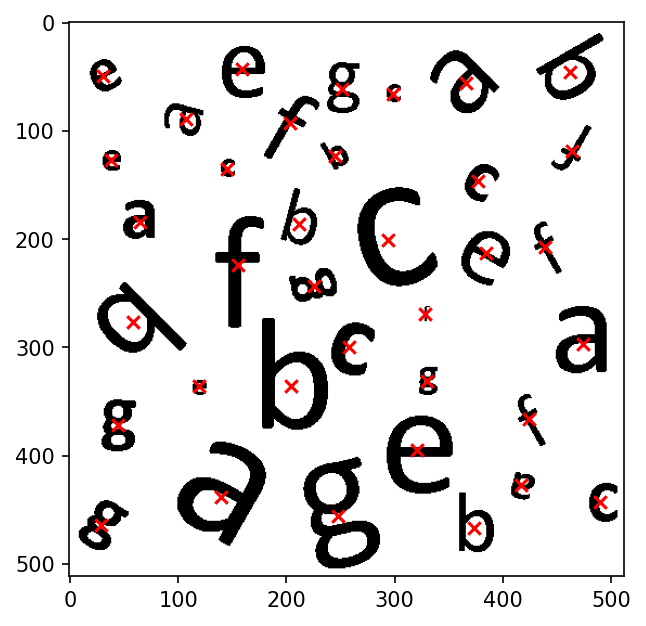

In [29]:
# Graficar la imagen y los centros de masa
plt.figure(dpi=150)
plt.imshow(img, cmap='gray')
plt.scatter([c[0] for c in centros_de_masa], [c[1] for c in centros_de_masa], color='red', marker='x')
plt.show()